
# Introduction



This is a very basic set of instructions for preparing 3D-printed visualizations from datasets available through the City of Toronto's [Open Data Portal](https://portal0.cf.opendata.inter.sandbox-toronto.ca/). 




# Preparation



-   Make sure you have a working Python installation!
-   Download Anaconda (if you don't have a Python installation): [https://www.anaconda.com/download/](https://www.anaconda.com/download/)
-   You will need the following Python libraries: pandas, numpy, stat, matplotlib, seaborn, plotly
-   Set up JupyterLab or Jupyter Notebook: [https://anaconda.org/conda-forge/jupyterlab](https://anaconda.org/conda-forge/jupyterlab)
-   Download Blender if you don't have 3D modeling software: [https://www.blender.org/download/](https://www.blender.org/download/)
-   Download QGIS if you want to create maps: [https://qgis.org/en/site/forusers/download.html](https://qgis.org/en/site/forusers/download.html)




# Data Sources



We will be taking data from the City of Toronto's portal, but there are various other interesting datasets that you might consider working with: biometric/self-tracking/fitbit; kaggle datasets (the pokemon one is fun if you're working with kids); 

That said, I would recommend working with a simple dataset first, or spending lots of time looking at your data in a spreadsheet before moving forward. I have included some very basic cleaning functions in the notebook cells below. 

Some tips on selecting and preparing your data:

-   There are various tools you can use to clean/munge/prepare your data, including Excel, Libre Office Calc, R, etc. I prefer pandas, a Python library for data analysis. There are numerous excellent tutorials that detail how to import and prepare data (using pandas) in an iPython/Jupyter notebook
-   If you are using a

For this exercise, we will be working with pedestrian data from the King Street Pilot Project. All data was scraped from the .pdf reports that the city of Toronto has made available here: [https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/)
The data is available in the data directory of the repository that contains this file.  




# Working with Data in Jupyter



Import the necessary libraries:



In [92]:
import pandas as pd
import numpy as np
import stat as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

Import your data:



In [93]:
pvol = pd.read_csv('data/king_pedestrian_volume.csv')

Set the figure size for data graphics:



In [94]:
plt.rcParams['figure.figsize'] = [10, 8]

Set the index for the pandas dataframe you've created:



In [95]:
pvol.set_index('street')

,am_bathurst_baseline,am_bathurst_january,am_bathurst_february,am_bathurst_march,am_bathurst_april,am_bathurst_may,am_bathurst_june,am_spadina_baseline,am_spadina_january,am_spadina_february,...,pm_bay_april,pm_bay_may,pm_bay_june,pm_jarvis_baseline,pm_jarvis_january,pm_jarvis_february,pm_jarvis_march,pm_jarvis_april,pm_jarvis_may,pm_jarvis_june
street,,,,,,,,,,,,,,,,,,,,,
queen,1810,1640,1750,1760,1790,1960,1770,2000,1880,1790,...,4890,8340,9280,1320,1140,1300,1210,1300,1450,1460
king,2820,2680,2620,2590,2580,2890,2780,4150,3580,3690,...,5540,8060,8190,3370,3760,4050,3930,4060,3920,4080


Create some objects for each street. Normally, I wouldn't want such long names (and wide dataframes), but explaining the hows and whys of reshaping data takes too long. If you're interested, read Hadley Wickham's papers on the subject ([http://vita.had.co.nz/papers/tidy-data.html](http://vita.had.co.nz/papers/tidy-data.html)) or follow these instructions for reshaping in pandas: [https://pandas.pydata.org/pandas-docs/stable/reshaping.html](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)



In [96]:
#### am objects
# bathurst
pvol_bathurst_am = pvol[['street',
                         'am_bathurst_baseline',
                         'am_bathurst_january',
                         'am_bathurst_february',
                         'am_bathurst_march',
                         'am_bathurst_april',
                         'am_bathurst_may',
                         'am_bathurst_june']]

# spadina
pvol_spadina_am = pvol[['street',
                        'am_spadina_baseline',
                        'am_spadina_january',
                        'am_spadina_february',
                        'am_spadina_march',
                        'am_spadina_april',
                        'am_spadina_may',
                        'am_spadina_june']]

# bay
pvol_bay_am = pvol[['street',
                    'am_bay_baseline',
                    'am_bay_january',
                    'am_bay_february',
                    'am_bay_march',
                    'am_bay_april',
                    'am_bay_may',
                    'am_bay_june']]

# jarvis
pvol_jarvis_am = pvol[['street',
                       'am_jarvis_baseline',
                       'am_jarvis_january',
                       'am_jarvis_february',
                       'am_jarvis_march',
                       'am_jarvis_april',
                       'am_jarvis_may',
                       'am_jarvis_june']]

#### pm objects
# bathurst
pvol_bathurst_pm = pvol[['street',
                         'pm_bathurst_baseline',
                         'pm_bathurst_january',
                         'pm_bathurst_february',
                         'pm_bathurst_march',
                         'pm_bathurst_april',
                         'pm_bathurst_may',
                         'pm_bathurst_june']]

# spadina
pvol_spadina_pm = pvol[['street',
                        'pm_spadina_baseline',
                        'pm_spadina_january',
                        'pm_spadina_february',
                        'pm_spadina_march',
                        'pm_spadina_april',
                        'pm_spadina_may',
                        'pm_spadina_june']]

# bay
pvol_bay_pm = pvol[['street',
                    'pm_bay_baseline',
                    'pm_bay_january',
                    'pm_bay_february',
                    'pm_bay_march',
                    'pm_bay_april',
                    'pm_bay_may',
                    'pm_bay_june']]

# jarvis
pvol_jarvis_pm = pvol[['street',
                       'pm_jarvis_baseline',
                       'pm_jarvis_january',
                       'pm_jarvis_february',
                       'pm_jarvis_march',
                       'pm_jarvis_april',
                       'pm_jarvis_may',
                       'pm_jarvis_june']]

Create a grouped bar chart using the plotly library. There are lots of ways to adjust the colours if you want, but I like my charts to look like life savers ;-)



In [97]:
#### plotly-based grouped bar charts
# AM Bathurst
baseline = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_baseline'],
    name='AM Bathurst Baseline',
    hoverinfo='y+name'
)
january = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_january'],
    name='AM Bathurst January',
    hoverinfo='y+name'
)
february = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_february'],
    name='AM Bathurst February',
    hoverinfo='y+name'
)
march = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_march'],
    name='AM Bathurst March',
    hoverinfo='y+name'
)
april = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_april'],
    name='AM Bathurst April',
    hoverinfo='y+name'
)
may = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_may'],
    name='AM Bathurst May',
    hoverinfo='y+name'
)
june = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_june'],
    name='AM Bathurst June',
    hoverinfo='y+name'
)

data = [baseline, january, february, march, april, may, june]
layout = go.Layout(
    barmode='group',
    # bargap=0.15,
    bargroupgap=0.1,
    hovermode='closest'
    # showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

The dataframe provides data for the 7-10 am and 4-7 pm peak periods at the intersections Bathurst, Spadina, Bay, and Jarvis at both King and Queen. Change your arguments accordingly to prepare different charts.

Using the standard pandas plotting functions (which rely on matplotlib), you can prepare bare-bones static charts (use matplotlib or seaborn if you want to customize):



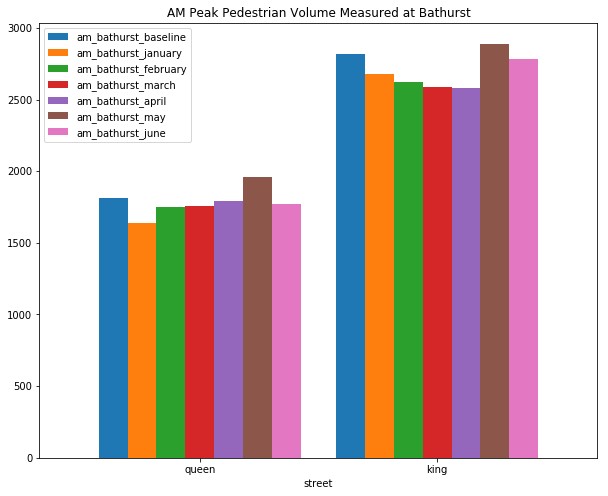

In [98]:
pvol_bathurst_am.plot.bar(x='street', 
                          rot=0,
                          width=0.85, 
                          title='AM Peak Pedestrian Volume Measured at Bathurst');

If you want horizontal charts, you can chain barh to the plot method:



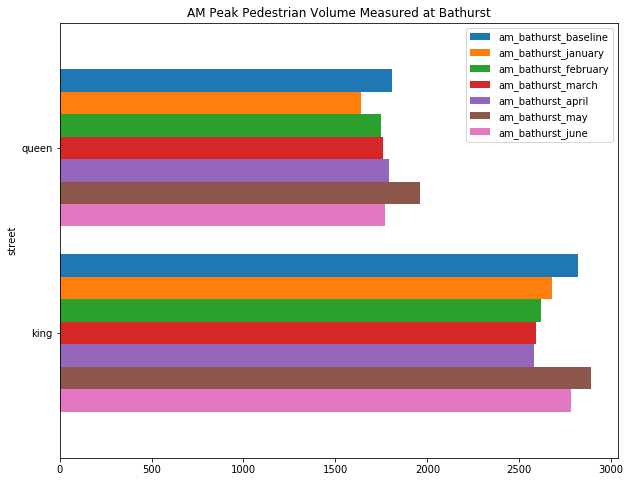

In [99]:
pvol_bathurst_am.plot.barh(x='street', 
                           rot=0,
                           width=0.85,
                           title='AM Peak Pedestrian Volume Measured at Bathurst')
plt.gca().invert_yaxis();


# 3D Bars in Blender



This assumes that you have the csv and bpy modules in your system. Depending on your operating system and Python configuration, you may need to install and configure separately.

-   open king<sub>pedestrian</sub><sub>volume.csv</sub> in a spreadsheet application (calc or excel) and copy the entire row for queen
-   open a new window/file and paste special with the transpose option to turn your row of data into a column
-   remove the "queen" row at the top, then save as pvol<sub>queen.csv</sub>
-   repeat these steps for king
-   in Blender, open up a text editor window
-   use the 3Dbars.py script and make sure to import pvol<sub>king.csv</sub> and pvol<sub>queen.csv</sub> separately
-   export entire block or separate streets as .obj or .stl files




# Preparing 3D Data Maps



We are going to work with data from the [2016 Neighbourhood Profiles Dataset](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a). Specifically, we will compare population growth between 2011 and 2016 (which comes from the 2016 Census - [more info here](https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Geo2=PR&Code2=01&Data=Count&SearchType=Begins&SearchPR=01&TABID=1&B1=All&Code1=3520005&SearchText=toronto)). I've already cleaned and processed the dataset so it will play nice with QGIS. Both the raw and processed .csv files are in the data directory. 

**If you're going to use Excel or Calc, here are some steps to follow:**

-   data setup [http://www.qgis.nl/2012/07/13/koppelen-van-data-uit-csv-bestand/?lang=en](http://www.qgis.nl/2012/07/13/koppelen-van-data-uit-csv-bestand/?lang=en)
-   cut the row you want and paste special into a new document. transpose the row into a column.
-   in order to get appropriate scale in later 3D model, concatenate a decimal and zero to cell and copy down the column (could also change the shapefile size parameters in qgis).
-   cut the column and paste special it
-   (right click to) format first column and make sure it has leading zeroes to match the id values in the shapefile
-   make sure you have a csvt and follow formula in current one [https://anitagraser.com/2011/03/07/how-to-specify-data-types-of-csv-columns-for-use-in-qgis/](https://anitagraser.com/2011/03/07/how-to-specify-data-types-of-csv-columns-for-use-in-qgis/)

**Here are some additional things you can do with pandas and numpy to change scales.** 

Import the data:



In [100]:
df = pd.read_csv('data/neighbourhood_pop.csv', dtype=str) # dtype str will keep the leading zeroes
df.head()

,id,2011,2016
0,001,0.0341,0.033312
1,002,0.032788,0.032954
2,003,0.010138,0.01036
3,004,0.010488,0.010529
4,005,0.00955,0.009456


Set index to ID:



In [101]:
df.set_index('id', inplace=True)

Convert strings to floats in order to use numpy functions:



In [102]:
df['2011'] = df['2011'].astype(str).astype(float)
df['2016'] = df['2016'].astype(str).astype(float)

Depending on the data you use, you might have to re-scale to make it printable. Consider the following image:



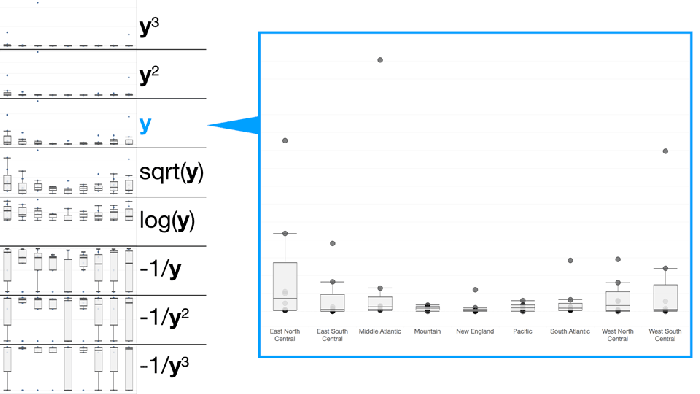

In [103]:
from IPython.display import Image
Image(filename='images/ladder2.gif')

You can use numpy to convert to square root:



In [104]:
df['2016'] = np.sqrt(df['2016'])
df.head()

,2011,2016
id,,
001,0.034100,0.182516
002,0.032788,0.181532
003,0.010138,0.101784
004,0.010488,0.102611
005,0.009550,0.097242


Or logarithmic:



In [105]:
df['2011'] = np.log10(df['2011'])

When you're done processing, you can output a new .csv for import into QGIS:



In [106]:
df.to_csv('data/neighbourhood_pop_scaled.csv')

**in QGIS:**

-   download the [neighbourhoods shapefile](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#a45bd45a-ede8-730e-1abc-93105b2c439f) - you want the WGS84 coordinate system (I've included the files you need in the data directory)
-   use ctrl-shift-v to add vector layer
-   select the entire .zip that you downloaded
-   import neighbourhood<sub>pop.csv</sub> as a vector layer (not as a delimited one)
-   join data from csv to existing shapefile [https://gis.stackexchange.com/questions/182281/how-to-join-data-from-excel-to-an-attribute-table-in-qgis-without-creating-dupli](https://gis.stackexchange.com/questions/182281/how-to-join-data-from-excel-to-an-attribute-table-in-qgis-without-creating-dupli)
-   save a new shapefile and edit column names if you wish

**in Blender:**

-   Make sure you have the BlenderGIS plugin installed: [https://github.com/domlysz/BlenderGIS](https://github.com/domlysz/BlenderGIS)
-   set extrusion to the specific data column
-   extrude along z axis
-   if you want, separate the objects and create object names from the id field
-   change coordinates to WGS84 latlon
-   add a base or make the objects solid (use solidify modifier) if you want




# Preparing to 3D Print



Some blender tips:

-   installing braille [https://blender.stackexchange.com/questions/39437/braille-text-in-blender](https://blender.stackexchange.com/questions/39437/braille-text-in-blender)
-   go into the text editor stuff and find the font to load
-   go into edit mode and extrude/bevel accordingly

There are numerous software applications that you might use for preparing models prior to setting them up to print. Among them, I recommend meshlab [http://www.meshlab.net/](http://www.meshlab.net/), meshmixer [http://www.meshmixer.com/](http://www.meshmixer.com/), and cotangent [https://www.cotangent.io/](https://www.cotangent.io/).




# Printing Considerations



Some things to think about if you're preparing tactile models for blind users. 

-   Braille is very tricky to print. If you're using an FDM printer, be careful that traces of excess filament are not being dragged across the dots.
-   Printing does not have to be static. Think about how to separate your models into individual, reconfigurable/modular chunks in order to create dynamic data representations.

